# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

# Default library imports
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import torch

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
# for brain def. see: https://blogs.unity3d.com/2017/09/19/introducing-unity-machine-learning-agents/
# " Each Brain defines a specific state and action space, and is responsible for deciding which actions 
# each of its linked agents will take. "

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print('Brain Name: ',env.brain_names)

Brain Name:  ['TennisBrain']


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The ***observation space consists of 8 variables*** corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. ***Two continuous actions*** are available, corresponding to movement toward (or away from) the net, and jumping.

The task is episodic, and in order to solve the environment, your agents must get an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents). Specifically,

- After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially different) scores. We then take the maximum of these 2 scores.
- This yields a single score for each episode.

The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. DDPG Agent

I chose to solve the environment with a Deep Deterministic Policy Gradient (DDPG) agent because it is amenable for use with continuous action spaces. Additionally, there is a well developed code base available for the DDPG agent from Udacity to build on and refine.

### Network Architecture

Both actor and critic networks consist of two hidden layers of 128 features each. I experimentd with batch normalization, a features that was highly additive to the previous continous control project, but it seemed to degrade performance. The material changes to the default algorithm that improved training performance were to increase TAU and the learning rate. I also decrease the buffer size and the batch size. Many of these changes were made simultaneously and hence more research is required to understand the effect of each contributor. Many of these changes were motivated from group conversations with other students via the Slack channel. 

I also included augmented the agent reward with a a 'team spirit' parameter such that the reward of each agent was the agent't own reward plus a fraction (0.50) of the other agent's reward.

Hyper parameters:

    BUFFER_SIZE = int(1e5)
    BATCH_SIZE = 128
    GAMMA = 0.99
    TAU = 2e-2
    LR_ACTOR = 1e-3
    LR_CRITIC = 5e-4
    WEIGHT_DECAY = 0

### Improvements

As suggested by a few members of the community on the Slack channel, synchronizing the initialized weights between the target and the local network significantly sped up the learning process. This was a feature used in this project and the last.

### Results

The agent was able to solve the environment in under 1000 episodes. I chose to run the training until the average of the two agents surpassed the 0.50 threshold score, a higher bart than 0.50 for the better agent.

In [9]:
def ddpg(n_episodes=3000, max_t=1000, num_agents=num_agents, team_spirit=0.5):
    scores = []
    scores_deque = deque(maxlen=100)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]    # reset env
        for agent in agents:
            agent.reset()                                    # reset agent   

        state = env_info.vector_observations                 # get state
        score = 0                                            # init score
        for t in range(max_t):
            #print('Episode:',i_episode,', t:',t)
            #print('State:',state)  
            
            actions = [agents[k].act(state[k]) for k in range(num_agents)]  # generate action with agent-policy
            #print('Action:',actions)
            
            env_info = env.step(actions)[brain_name]         # play policy action
            next_state = env_info.vector_observations        # observe new state
            rewards = env_info.rewards                # observe rewards. Sum to create joint reward.
            done = env_info.local_done[0]                    # check if episode is done
            #print('Reward:',rewards,', Done: ', done)
            #print('Next State:',next_state)
            
            for k in range(num_agents):
                adj_reward = rewards[k] + team_spirit*rewards[1-k]
                agents[k].step(state[k], actions[k], adj_reward, next_state[k], done) # train agent with observed (S,A,R,S')-tuple 
            
            state = next_state
            score += np.mean(rewards)
            if done:
                break 
                
        scores_deque.append(score)
        scores.append(score)
        avg_score = np.mean(scores_deque)
        print('\rEpisode {}\tScore: {:.2f}\tMov.Average Score: {:.2f}'.format(i_episode, score, avg_score), end="\n")

        if avg_score>=0.5:
            torch.save([agent.actor_local.state_dict() for agent in agents], 'checkpoint_actor.pth')
            torch.save([agent.critic_local.state_dict() for agent in agents], 'checkpoint_critic.pth')     
            break
            
    return scores

In [10]:
from ddpg_agent import Agent

agents = [Agent(state_size=state_size, action_size=2) for j in range(num_agents)]         
scores = ddpg(n_episodes=3000)

Episode 1	Score: 0.05	Mov.Average Score: 0.05
Episode 2	Score: -0.00	Mov.Average Score: 0.02
Episode 3	Score: -0.00	Mov.Average Score: 0.01
Episode 4	Score: -0.00	Mov.Average Score: 0.01
Episode 5	Score: -0.00	Mov.Average Score: 0.01
Episode 6	Score: -0.00	Mov.Average Score: 0.00
Episode 7	Score: -0.00	Mov.Average Score: 0.00
Episode 8	Score: -0.00	Mov.Average Score: 0.00
Episode 9	Score: -0.00	Mov.Average Score: 0.00
Episode 10	Score: -0.00	Mov.Average Score: 0.00
Episode 11	Score: -0.00	Mov.Average Score: -0.00
Episode 12	Score: -0.00	Mov.Average Score: -0.00
Episode 13	Score: -0.00	Mov.Average Score: -0.00
Episode 14	Score: -0.00	Mov.Average Score: -0.00
Episode 15	Score: -0.00	Mov.Average Score: -0.00
Episode 16	Score: -0.00	Mov.Average Score: -0.00
Episode 17	Score: -0.00	Mov.Average Score: -0.00
Episode 18	Score: -0.00	Mov.Average Score: -0.00
Episode 19	Score: -0.00	Mov.Average Score: -0.00
Episode 20	Score: -0.00	Mov.Average Score: -0.00
Episode 21	Score: -0.00	Mov.Average Scor

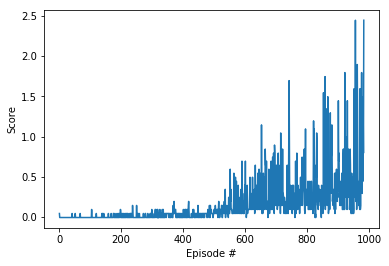

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [12]:
env.close()

### 5. Future Work

- It would be interesting to create a shared experience buffer. This could be done by figuring out which state variables (i.e. directional ball velocity) need to be reflected so that the agent position (left vs right) is equally releveant to all agents.
- Much work could be done understanding which hyper-parameters could be tuned for more efficient training.
- I would like to understand parameter evolution with the inclusion/linking of TensorBoard.